In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


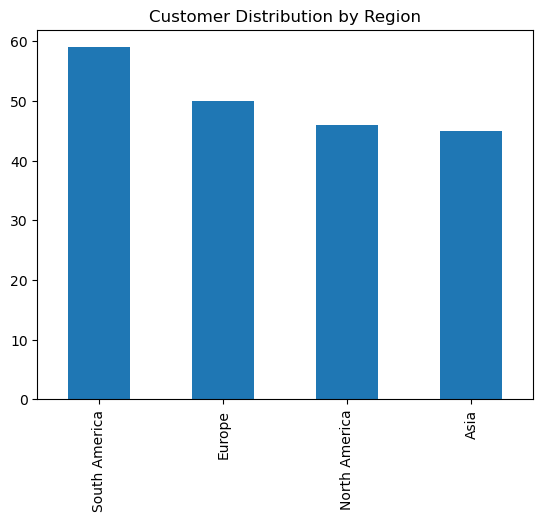

In [9]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region')
plt.show()


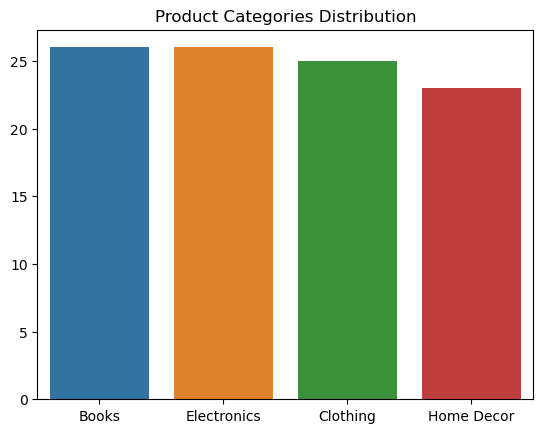

In [10]:
category_counts = products['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Product Categories Distribution')
plt.show()


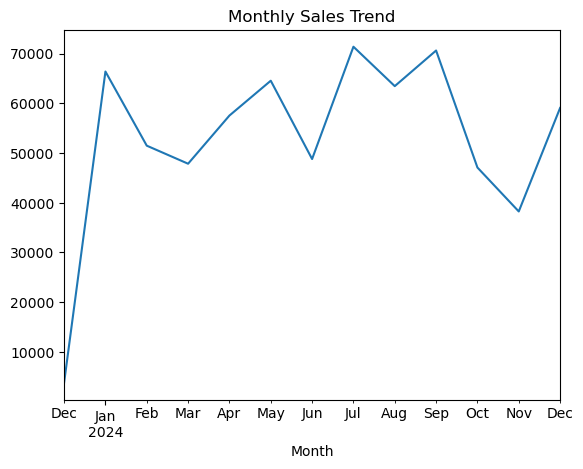

In [11]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.show()


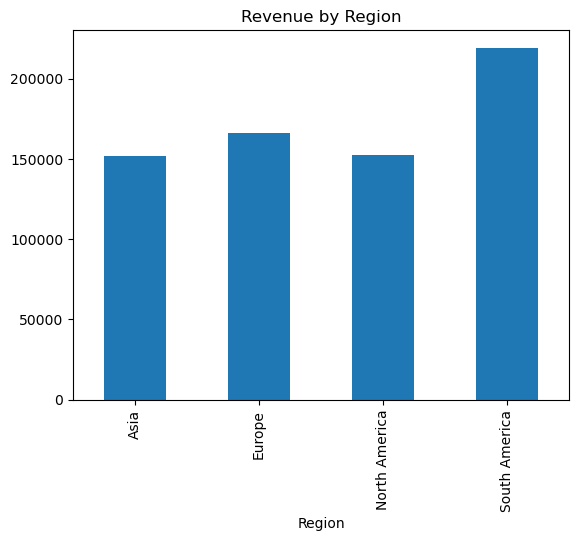

In [12]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

#Revenue by Region
region_revenue = data.groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='bar', title='Revenue by Region')
plt.show()
